## Replication for *Bankers in the Ivory Tower*, January 4, 2021
### By Charlie Eaton

### Figure 1.1: Percentage frosh with zero student debt by higher education strata

In [1]:
insheet using data/f1_1bankers.csv, clear

(8 vars, 133,642 obs)


In [2]:
quietly {
    drop if loan_p>100 | loan_p<0
gen debtfree_p=100-loan_p

*drop if all_under==.
drop if iclevel>1 & control==1

gen strata=control
replace strata=0 if top30private==1
replace strata=4 if top30public==1
replace strata=5 if unitid==166027 | unitid==130794 | unitid==186131 | unitid==243744
collapse (mean) debtfree_p [aweight=loan_n], by(strata year)

reshape wide debtfree_p, i(year) j(strata)

lab var debtfree_p0 "Top 30 private"
lab var debtfree_p1 "Public"
lab var debtfree_p2 "Non-profit"
lab var debtfree_p3 "For-profit"
lab var debtfree_p4 "Top 30 public"
lab var debtfree_p5 "Harvard, Princeton, Stanford, Yale"
}

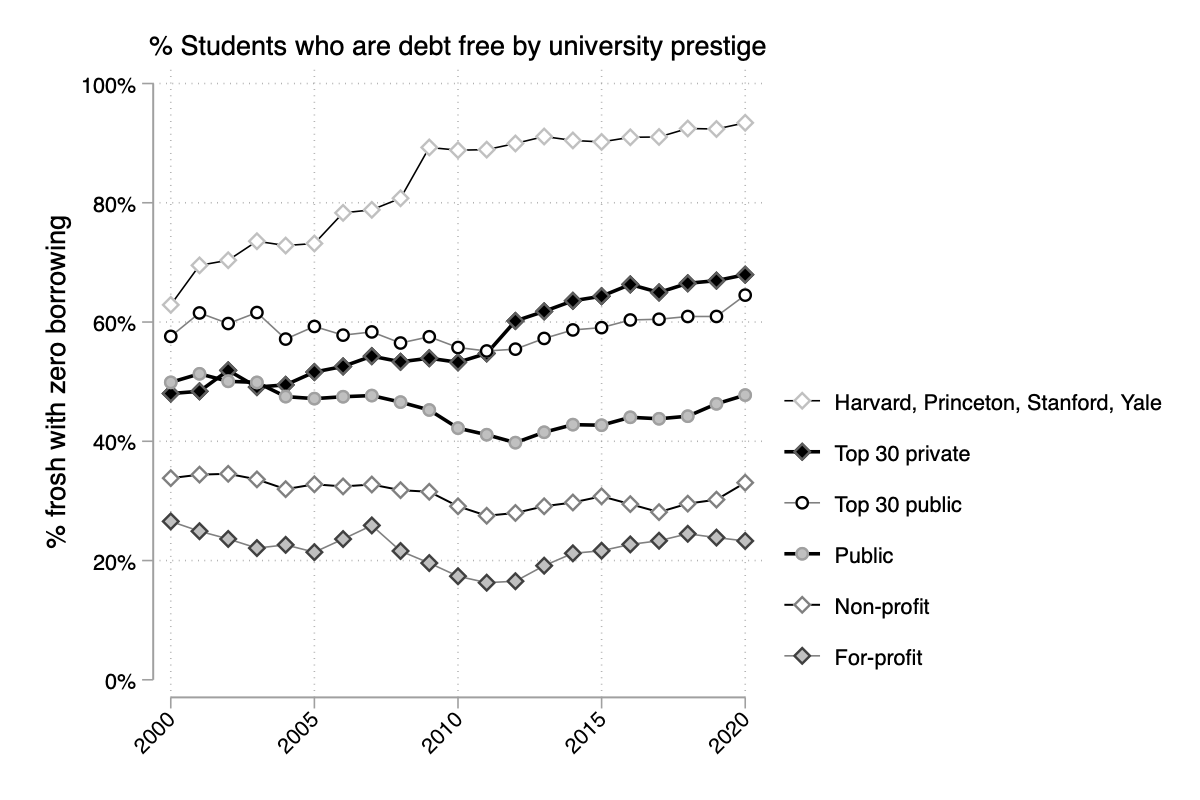




file
    /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/chapter1/figures/f1_1banker
    > sdebtfree.pdf saved as PDF format


In [3]:
graph tw (connect debtfree_p0 debtfree_p1 debtfree_p2 debtfree_p3 debtfree_p4 debtfree_p5 year, sort msym(D O D D O D) ///
	legend(order(6 1 5 2 3 4) symysize(5) size(small) ) ///
	mfc(black gs12 white gs12 white white) ///
	lp(l l l l l l) lc(black black black gs8 gs8 black) ///
	lw(medthick medthick medthin thin thin thin) ///
	xlabel(2000(5)2020, ang(45)) ///
	ylabel(0 "0%" 20 "20%" 40 "40%" 60 "60%" 80 "80%" 100 "100%") ///
	ytitle("% frosh with zero borrowing") ///
	xtitle("") name(debtfree_p, replace) scheme(plotplain) ///
    title(% Students who are debt free by university prestige))

graph export figures/f1_1bankersdebtfree.pdf, replace

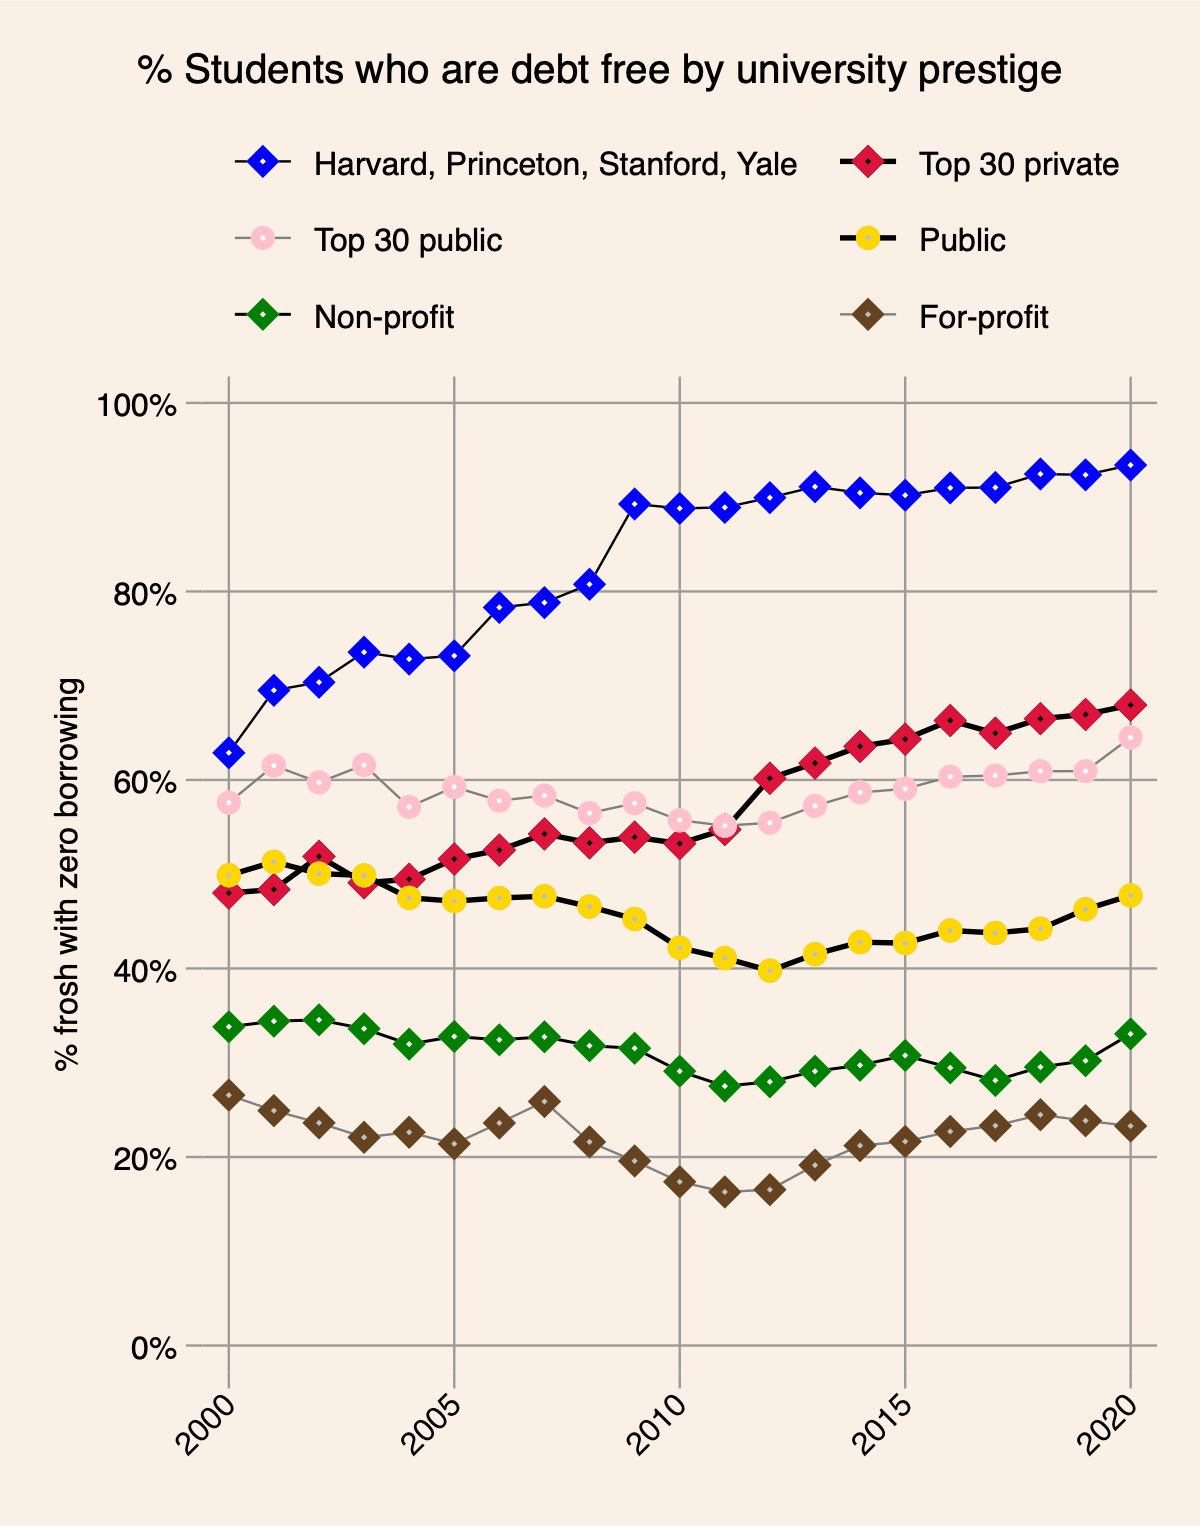




file
    /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/chapter1/figures/f1_1banker
    > sdebtfreedubois.pdf saved as PDF format


In [4]:
graph tw (connect debtfree_p0 debtfree_p1 debtfree_p2 debtfree_p3 debtfree_p4 debtfree_p5 year, sort msym(D O D D O D) ///
	legend(order(6 1 5 2 3 4) symysize(5) size(small) pos(12) col(2)) ///
	mfc(black gs12 white gs12 white white) ///
	lp(l l l l l l) lc(black black black gs8 gs8 black) ///
	lw(medthick medthick medthin thin thin thin) ///
	xlabel(2000(5)2020, ang(45)) ///
	ylabel(0 "0%" 20 "20%" 40 "40%" 60 "60%" 80 "80%" 100 "100%") ///
	ytitle("% frosh with zero borrowing") ///
	xtitle("") name(debtfree_p, replace) scheme(dubois) ///
    title(% Students who are debt free by university prestige))

graph export figures/f1_1bankersdebtfreedubois.pdf, replace